In [1]:
#RIL- Q-Leqarning ALgorithm Implementation
import numpy as np
import pylab as plt

In [2]:
#map cells to each point
points_list=[(0,4),(4,3),(3,2),(3,1),(1,5),(4,5)]

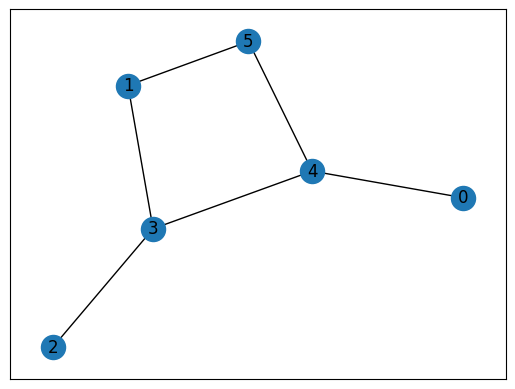

In [3]:
goal=5
import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [4]:
#set reward matrix R
R=np.array([[-1,-1,-1,-1,0,-1],
            [-1,-1,-1,0,-1,100],
            [-1,-1,-1,0,-1,-1],
            [-1,0,0,-1,0,-1],
            [0,-1,-1,0,-1,100],
            [-1,0,-1,-1,0,100]])
print(R)

[[ -1  -1  -1  -1   0  -1]
 [ -1  -1  -1   0  -1 100]
 [ -1  -1  -1   0  -1  -1]
 [ -1   0   0  -1   0  -1]
 [  0  -1  -1   0  -1 100]
 [ -1   0  -1  -1   0 100]]


In [5]:
#Initialize Q matrix
Q=np.zeros((6,6))
print(Q)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [6]:
#set learning parameter gammma
gamma=0.8

In [7]:
#this function returns all available actions in the state givcen as an arguemnt
def available_actions(state):
  current_state_row=R[state,:]
  av_act=np.where(current_state_row>=0)[0]
  return av_act

In [8]:
#Get available actions in the current state
initial_state = 0
available_act=available_actions(initial_state)

In [9]:
#this function chooses at random which action to be performed within the range of all the available
def sample_next_action(available_actions_range):
  next_action=int(np.random.choice(available_act,1))
  return next_action

In [10]:
#sample next action to be performed
action=sample_next_action(available_act)

C:\Users\MSIS\AppData\Local\Temp\ipykernel_456\2739053116.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action=int(np.random.choice(available_act,1))


In [11]:
#this function updates the Q matrix according to the path selected and the Q learning algorith,
def update(current_state,action,gamma):
  max_index=np.where(Q[action,]==np.max(Q[action,:]))[0]

  if max_index.shape[0]>1:
    max_index=int(np.random.choice(max_index,size=1))
  else:
    max_index=int(max_index)
  max_value=Q[action,max_index]

  #Q learning formula
  Q[current_state,action]=R[current_state,action]+gamma*max_value

#update Q matrix
update(initial_state,action,gamma)

C:\Users\MSIS\AppData\Local\Temp\ipykernel_456\3798253445.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index=int(np.random.choice(max_index,size=1))


In [12]:
#Training
#Train over 10000 iterations. (Re-iterate the process above)
for i in range(10000):
  current_state=np.random.randint(0,int(Q.shape[0]))
  available_act=available_actions(current_state)
  action=sample_next_action(available_act)
  update(current_state,action,gamma)

C:\Users\MSIS\AppData\Local\Temp\ipykernel_456\2739053116.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action=int(np.random.choice(available_act,1))
C:\Users\MSIS\AppData\Local\Temp\ipykernel_456\3798253445.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index=int(np.random.choice(max_index,size=1))
C:\Users\MSIS\AppData\Local\Temp\ipykernel_456\3798253445.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index=int(max_index)


In [13]:
#normalize the trained Q matrix
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

Trained Q matrix:
[[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.   64.    0.    0. ]
 [  0.   80.   51.2   0.   80.    0. ]
 [ 64.    0.    0.   64.    0.  100. ]
 [  0.   80.    0.    0.   80.  100. ]]


In [14]:
#Testing

#Goal state=5
current_state=2
steps=[current_state]

while current_state!=5:
  next_step_index=np.where(Q[current_state,:]==np.max(Q[current_state,:]))[0]
  if next_step_index.shape[0]>1:
    next_step_index=int(np.random.choice(next_step_index,size=1))
  else:
    next_step_index=int(next_step_index)

  steps.append(next_step_index)
  current_state=next_step_index

C:\Users\MSIS\AppData\Local\Temp\ipykernel_456\3514099611.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_step_index=int(next_step_index)
C:\Users\MSIS\AppData\Local\Temp\ipykernel_456\3514099611.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_step_index=int(np.random.choice(next_step_index,size=1))


In [15]:
#print selected sequence of steps
print("selected path:")
print(steps)

selected path:
[2, 3, 4, 5]
